k means clustering is unsupervised learning where no labels for data and we try to find underlying structure of the unlabelled data by means of clustering. k refers to random points of the datapoints that we consider as centroids for clusters if we have k =3 that 3 centroids are selected. Depending on the distance of each datapoint distance to the centroid they are added to a cluster that is minium distance is considered.
Steps:
Choose k — Number of clusters.
Initialize centroids — Randomly select k points.
Assign points — Assign each point to the nearest centroid.
Update centroids — Recalculate centroids as the mean of assigned points.
Repeat steps 3–4 until:
Cluster assignments don't change OR
Centroids stop moving.

Best way to determine k value is elbow method
Run K-Means with different values of k (e.g., 1 to 10).
For each k, calculate the inertia (sum of squared distances from points to their cluster center).and calculate total average SSE of all clusters
Plot k vs. inertia.
Look for the "elbow point" — where the decrease in inertia slows down sharply.
That point suggests the best k, balancing accuracy and simplicity.

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Data\income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

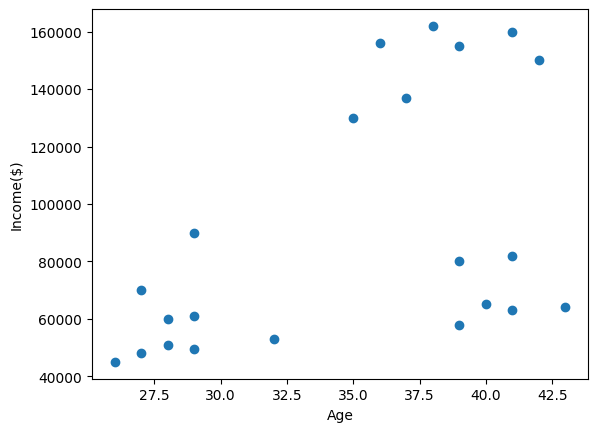

In [4]:
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [5]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
y_Predicted = km.fit(df[['Age', 'Income($)']]).predict(df[['Age', 'Income($)']])
y_Predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [8]:
df['cluster'] = y_Predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


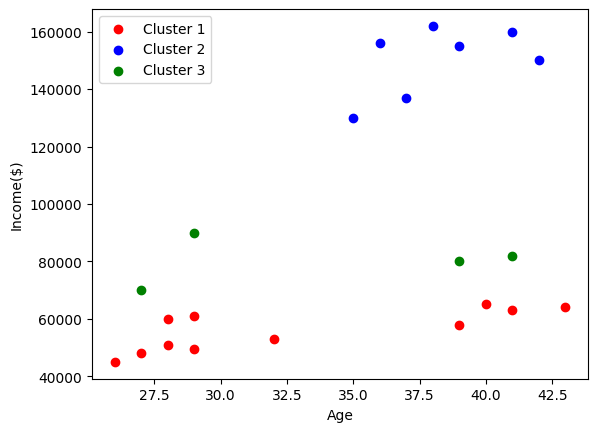

In [9]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['Age'], df1['Income($)'], color='red')
plt.scatter(df2['Age'], df2['Income($)'], color='blue')
plt.scatter(df3['Age'], df3['Income($)'], color='green') 

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])

In our plot, Income values (ranging from $40,000 to $160,000) are much larger than Age values (around 25–45).
K-Means relies on distance calculations, so features with larger ranges (like Income) dominate the distance.
This can cause the algorithm to ignore smaller-scale features like Age when forming clusters.

Min-Max Scaling fixes this:
It rescales all features to the same range (usually 0 to 1).
This ensures equal weight to Age and Income when computing distances.
As a result, K-Means forms more balanced and meaningful clusters.

In [12]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [13]:
km = KMeans(n_clusters=3)
y_Predicted = km.fit_predict(df[['Age', 'Income($)']])
y_Predicted


array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [16]:
df['cluster_n'] = y_Predicted
df.drop('cluster',axis ='columns', inplace=True)
df.head()

,Name,Age,Income($),cluster_n
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [18]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

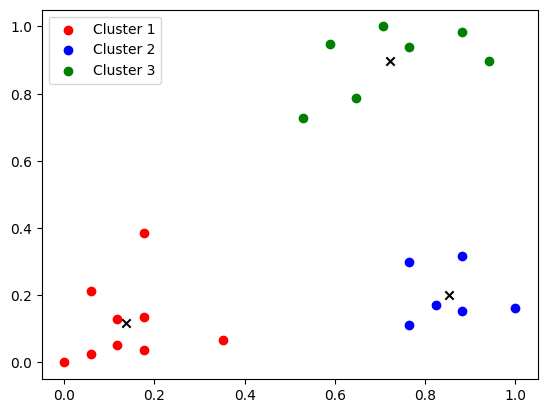

In [20]:
df1 =df[df.cluster_n==0]
df2 =df[df.cluster_n==1]
df3 =df[df.cluster_n==2]

plt.scatter(df1['Age'], df1['Income($)'], color='red')
plt.scatter(df2['Age'], df2['Income($)'], color='blue')
plt.scatter(df3['Age'], df3['Income($)'], color='green')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker='x',label ='Centroids')

plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])    

In [23]:
K_range = range(1, 10)
sse = []
for k in K_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_) # inertia is the sum of squared distances to the nearest cluster center
    

In [24]:
sse

[5.434011511988176,
 2.3456144914725936,
 0.47507834985530933,
 0.3491047094419564,
 0.2776818715436998,
 0.23431864372774674,
 0.20417376905728288,
 0.18524817828709825,
 0.10995816883086569]

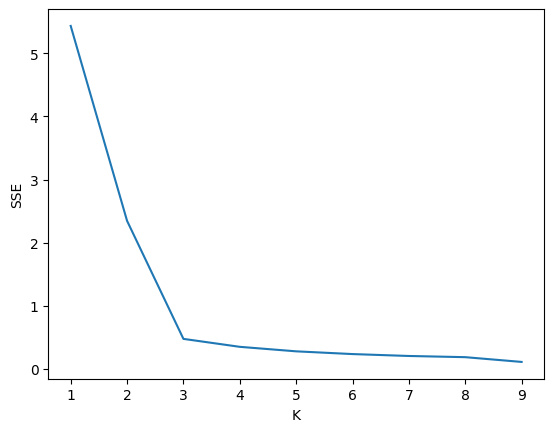

In [25]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(K_range, sse)